In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler # Used for scaling of data
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor


# df_train = pd.read_csv(
#     "../csv/all_small_vectors.csv", names=[
#     'P0','P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','P11','P12','P13','P14','P15','P16',
#     'P17','P18','P19','P20','P21','P22','P23','P24','P25','P26','P27','P28','P29'], header=None)
# #     X = df_train.drop('P29', axis=1)
# #     y = df_train['P29']




df_train = pd.read_csv(
    "../csv/all_big_vectors.csv", names=[\
    'P0','P1','P2','P3','P4','P5','P6','P7',
    'P8','P9','P10','P11','P12','P13','P14','P15',
    'P16','P17','P18','P19','P20','P21','P22','P23',
    'P24','P25','P26','P27','P28','P29','P30','P31',
    'P32','P33','P34','P35','P36','P37','P38','P39',
    'P40','P41','P42','P43','P44','P45','P46','P47',
    'P48','P49','P50','P51','P52','P53','P54','P55',
    'P56','P57','P58'], header=None)

#     X = df_train.drop('P58', axis=1)
#     y = df_train['P58']
    
# print(df_train.head(10))

df_train = df_train.fillna(0)

# X = df_train.loc[:, df_train.columns != 'P29']
# y = df_train.loc[:, df_train.columns == 'P29']

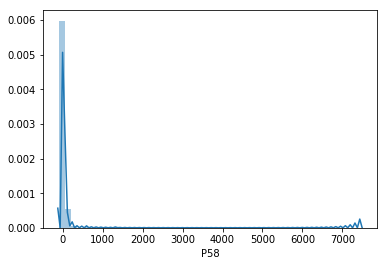

In [4]:
sns.distplot(df_train['P58'])

In [5]:
print("Skewness: %f" % df_train['P58'].skew())
print("Kurtosis: %f" % df_train['P58'].kurt())

Skewness: 29.491258
Kurtosis: 960.220247


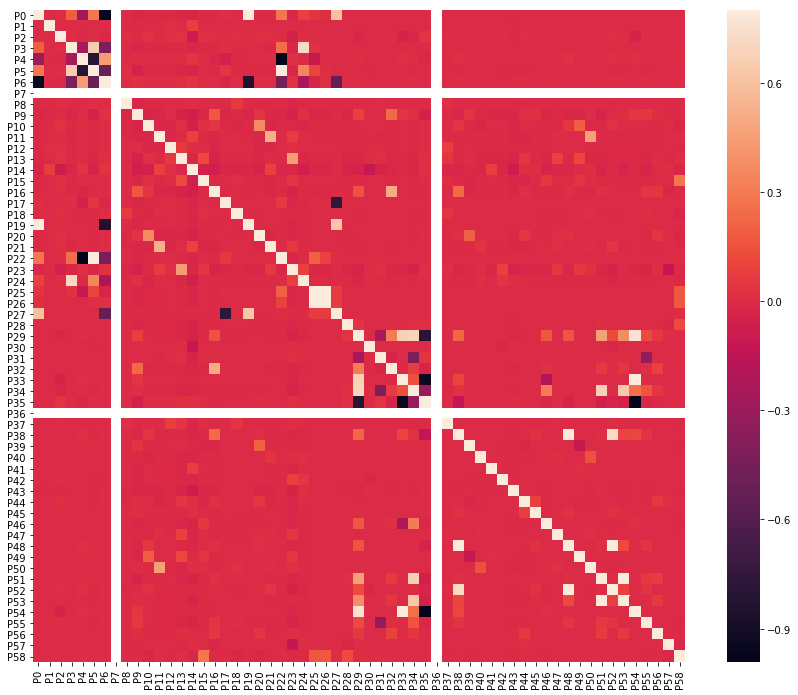

In [6]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

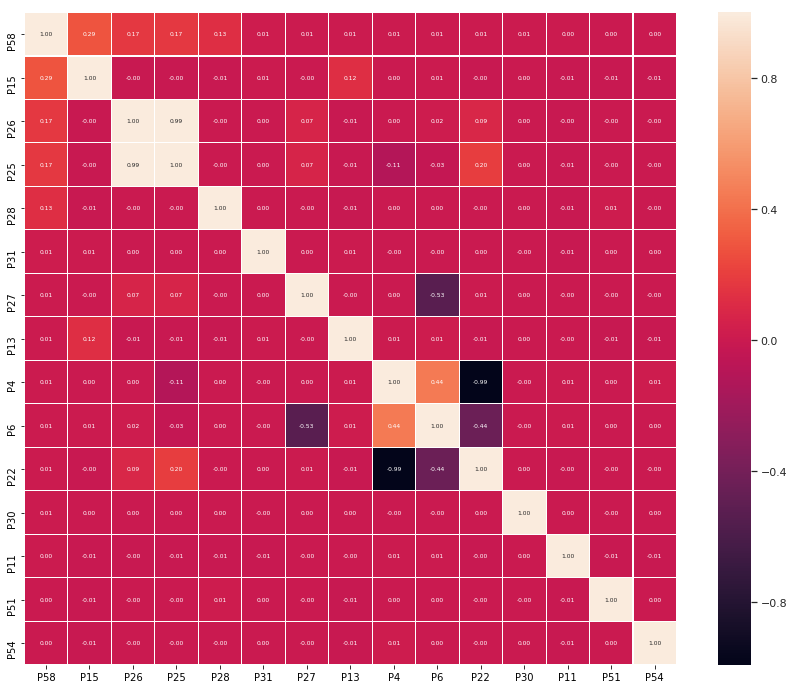

In [7]:
#market value correlation matrix
f, ax = plt.subplots(figsize=(15, 12))
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'P58')['P58'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 6}, yticklabels=cols.values,linewidths=0.1, xticklabels=cols.values)
plt.show()

In [8]:
df_train = df_train.fillna(df_train.mean())

In [ ]:
standardizing data
marketprice_scaled = StandardScaler().fit_transform(df_train['P58'][:,np.newaxis]);
low_range = marketprice_scaled[marketprice_scaled[:,0].argsort()][:10]
high_range= marketprice_scaled[marketprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)